# Importing Libraries

In [29]:
import pickle
import re
import matplotlib.pyplot as plt

## tools for nlp and wordcloud
import nltk # natural language tokenization 
from nltk.corpus import stopwords # list of english stopwords
from nltk.tokenize import word_tokenize # create tokens for our terms
from gensim.corpora import Dictionary # map terms to ids/numbers
from wordcloud import WordCloud

# Importing Data

In [35]:
with open('new_clean_data.pkl', 'rb') as file:
    df = pickle.load(file)

# Wordcloud

In [30]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [63]:
def wordcloud_generator(dataframe, column):

    df = dataframe

    # create tokenization column of all the video titles 
    df['token'] = df[column].apply(word_tokenize)

    # create list of english stop words
    stpwrd = stopwords.words('english')

    # create list of punction 
    punc = '!"#$%&()*+, -./:;<=>?@[\]^_`{|}~”“\''
    punc = [x for x in punc]

    # extend stpwrd list with punctuation
    stpwrd.extend(punc)

    # remove emojis
    df['clean_tokens'] = df[column].apply(remove_emoji)

    # remove web addresses
    df['clean_tokens'] = df['clean_tokens'].str.replace(r'(?:https)\S+', '', regex=True)

    # remove punctuation and stop words from tokens
    df['clean_tokens'] = df['token'].apply(lambda x: [word.lower() for word in x if word not in stpwrd])

    # only keep tokens with a length grater than 2
    df['clean_tokens'] = df['clean_tokens'].apply(lambda x: [word for word in x if len(word) > 3])

    # map terms to id numbers
    my_terms = Dictionary(documents = df['clean_tokens'])

    # create dictionary of term with its total number of occurrences
    clean_dictionary = {}

    for k,v in my_terms.cfs.items():
        if v>100:
            clean_dictionary[my_terms[k]] = v
    
    # create worldcloud 
    wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(clean_dictionary)
    plt.figure(figsize=(24,20))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()    
    

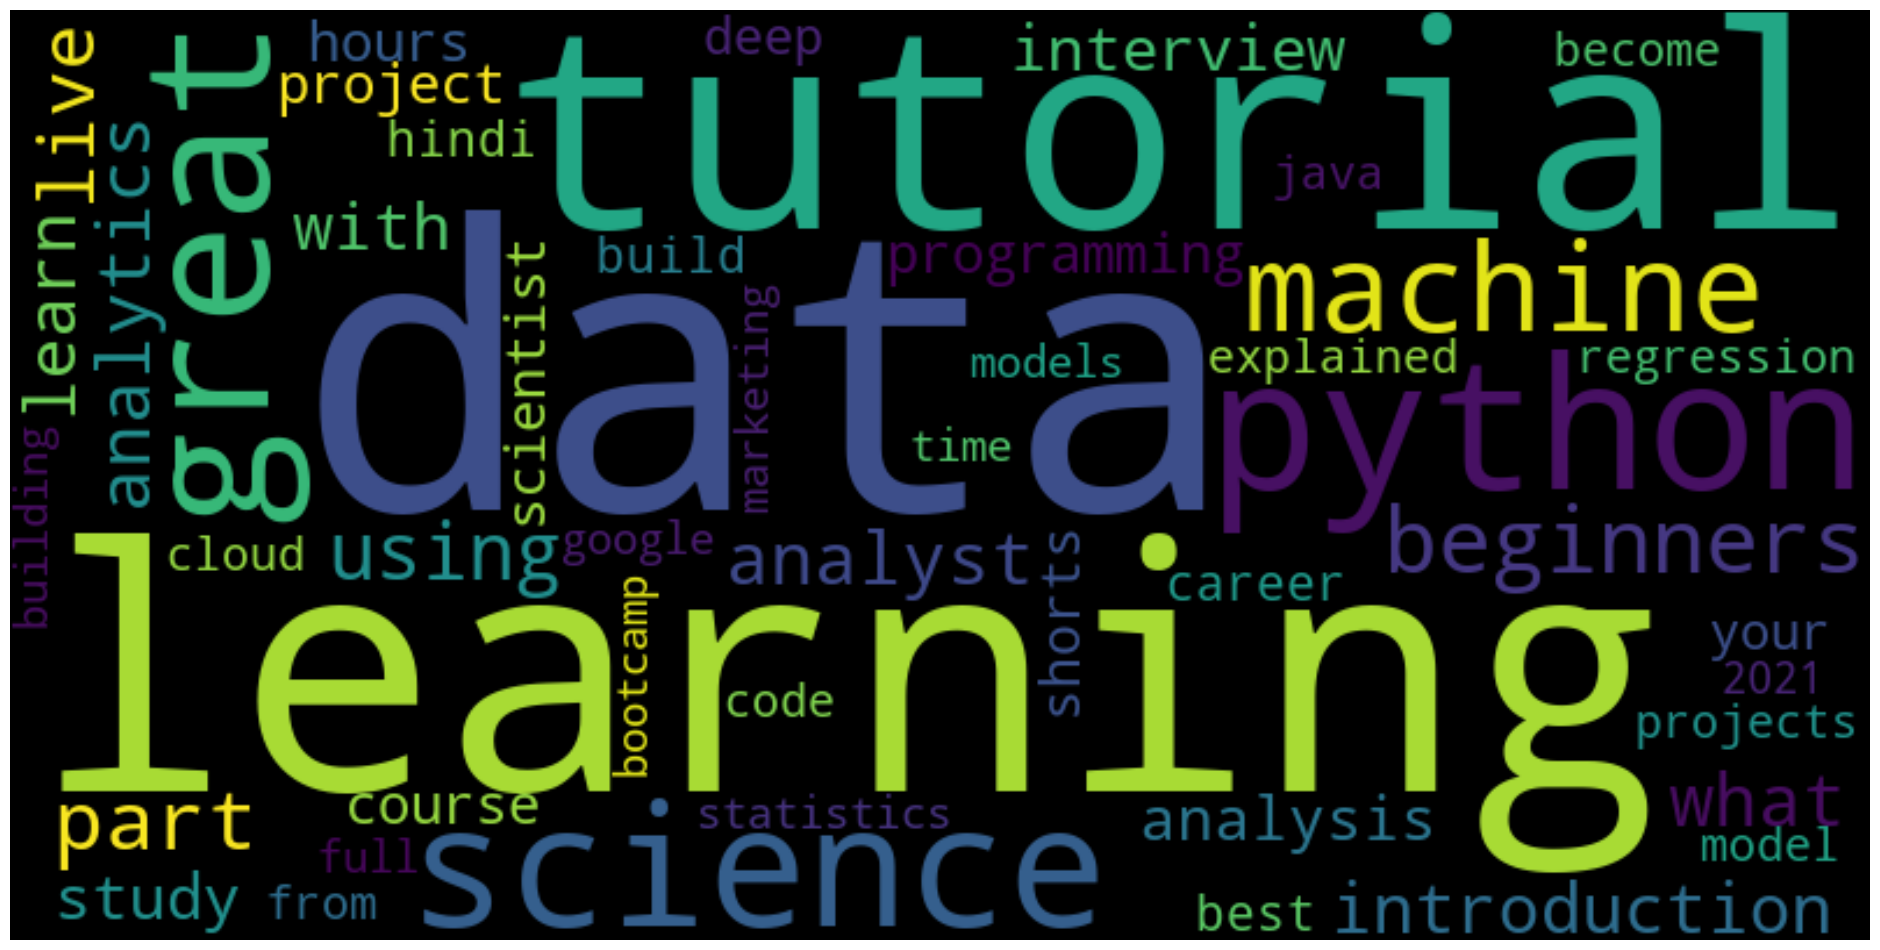

In [64]:
wordcloud_generator(df, 'title')

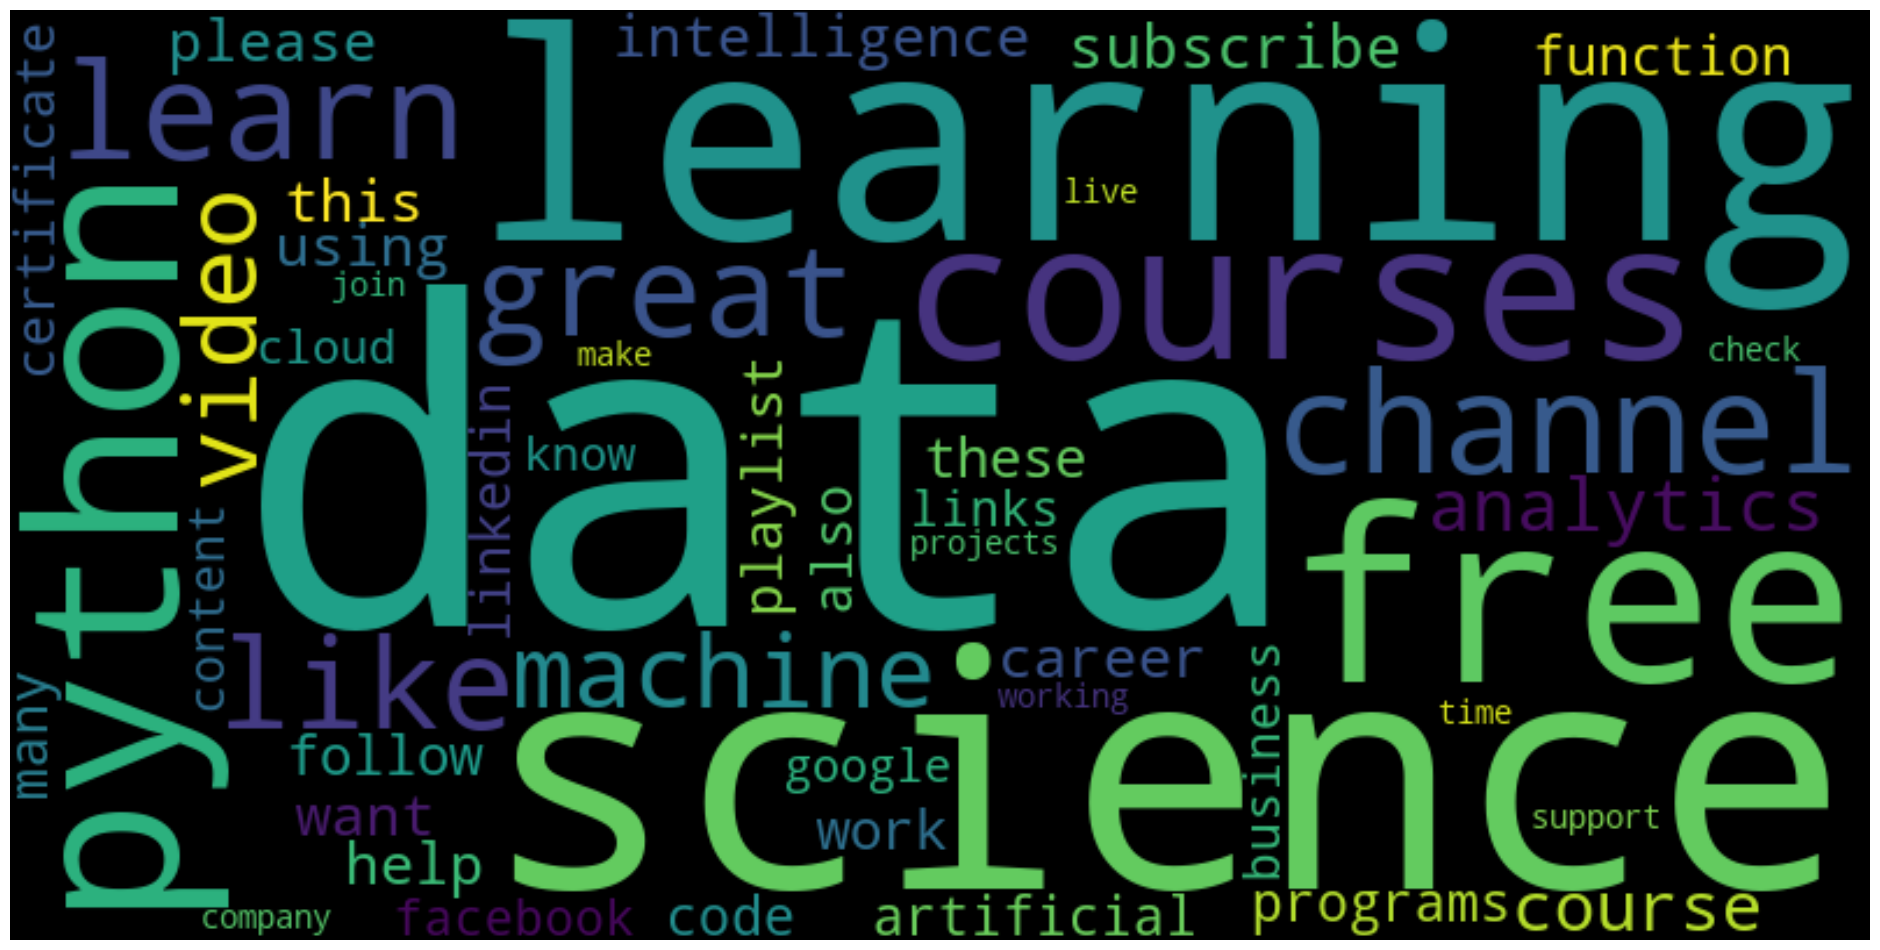

In [65]:
wordcloud_generator(df, 'description')